In [8]:
from sklearn import preprocessing
import numpy as np
le = preprocessing.LabelEncoder()
random_state=4
import pandas as pd
from Evaluation import synthsonic, writetodict, plotter, plot_oversampling, evaluate_oversamplers
import smote_variants as sv
from sklearn.tree import DecisionTreeClassifier

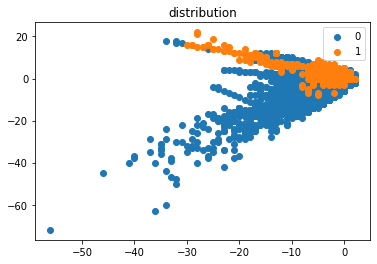

Counter({0: 284315, 1: 492})


In [2]:
# loading datasets

path = "/Users/tristenmarto/Documents/Studie/Thesis/Synthsonic_data_analysis/Datasets/"
data = path+"credit_fraud.csv"

data = pd.read_csv(data)

plotter(data.iloc[:,:-1].values,data.iloc[:,-1].values, "distribution")

data_dict = writetodict(data, 'credit_fraud')
X,y,name = data_dict['data'],data_dict['target'],data_dict['name']

2021-06-04 13:22:33,274:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2021-06-04 13:22:33,274:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


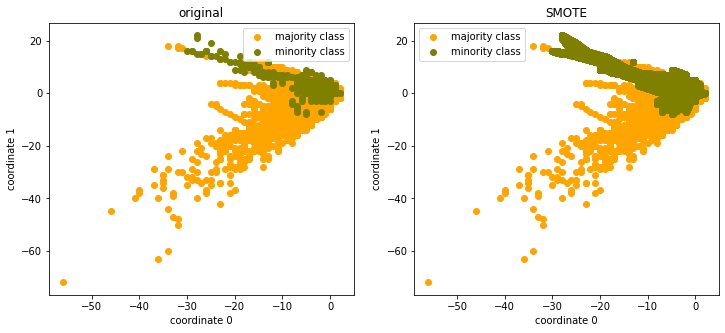

2021-06-04 13:22:39,805:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': <module 'numpy.random' from '/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2021-06-04 13:22:39,805:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': <module 'numpy.random' from '/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
n_quantiles (500) is greater than the total number of samples (492). n_quantiles is set to num samples.


minority class 1, min dataset (492, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 897.44it/s]
Generating for node: 20: 100%|██████████| 29/29 [00:09<00:00,  3.17it/s]


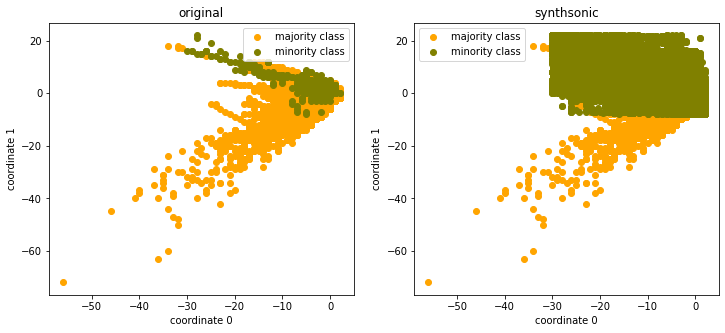

In [5]:
oversamplers = [sv.SMOTE, synthsonic]
plot_oversampling(X,y, oversamplers)

In [ ]:
import matplotlib.pyplot as plt
oversampler= synthsonic(distinct_threshold=1000)
X_samp, y_samp= oversampler.sample(X, y)

plt.figure(figsize=(12, 5))
ax= plt.subplot(121)
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label='minority class', c='olive', marker='o')
plt.title('original')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()

ax= plt.subplot(122)
plt.scatter(X_samp[y_samp == 0][:,0], X_samp[y_samp == 0][:,1], label='majority class', c='orange', marker='o')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,1], label='minority class', c='olive', marker='o')
plt.title(oversampler.__class__.__name__)
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 1')
plt.legend()
plt.show()

2021-06-04 13:27:41,297:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': 1000, 'random_state': <module 'numpy.random' from '/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
2021-06-04 13:27:41,297:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': 1000, 'random_state': <module 'numpy.random' from '/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>}")
n_quantiles (500) is greater than the total number of samples (492). n_quantiles is set to num samples.


minority class 1, min dataset (492, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 996.31it/s] 
Generating for node: 10:  69%|██████▉   | 20/29 [00:05<00:02,  3.47it/s]

In [3]:
datasets = [data_dict]
oversamplers = [synthsonic, sv.NoSMOTE, sv.SMOTE, sv.NT_SMOTE, sv.SMOTE_D]
classifier = DecisionTreeClassifier(random_state=random_state)
random_state = random_state

In [4]:
results = evaluate_oversamplers(datasets, oversamplers, classifier, random_state)

2021-06-03 13:59:41,549:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F95476EA050}")
2021-06-03 13:59:41,549:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F95476EA050}")
n_quantiles (500) is greater than the total number of samples (345). n_quantiles is set to num samples.


('synthsonic', "{'proportion': 1.0, 'n_jobs': 1, 'distinct_threshold': -1, 'random_state': RandomState(MT19937) at 0x7F95476EA050}")
minority class 1, min dataset (345, 29)


Building tree: 100%|██████████| 378/378.0 [00:00<00:00, 958.15it/s] 
Generating for node: 18: 100%|██████████| 29/29 [00:05<00:00,  5.04it/s]
2021-06-03 14:00:16,530:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-06-03 14:00:16,530:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


('NoSMOTE', '{}')


2021-06-03 14:00:18,505:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:00:18,505:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 14:00:28,121:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:00:28,121:INFO:NT_SMOTE: Running sampling via ('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


('NT_SMOTE', "{'proportion': 1.0, 'n_jobs': 1, 'random_state': 4}")


2021-06-03 14:00:41,488:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")
2021-06-03 14:00:41,488:INFO:SMOTE_D: Running sampling via ('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


('SMOTE_D', "{'proportion': 1.0, 'k': 3, 'n_jobs': 1, 'random_state': 4}")


/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/smote_variants/_smote_variants.py:10454: RuntimeWarning: invalid value encountered in true_divide
  p_ij = dist[:, 1:]/np.sum(dist[:, 1:], axis=1)[:, None]


In [5]:
resultdf = pd.DataFrame(results)
resultdf

,dataset,sampler,clf_score,recall,roc_auc_score,f1_score,brier_score_loss,runtime
0,credit_fraud,synthsonic,0.998915,0.748299,0.873747,0.683230,0.001087,26.453037
1,credit_fraud,NoSMOTE,0.998872,0.700680,0.849941,0.660256,0.001130,0.027956
2,credit_fraud,SMOTE,0.998787,0.687075,0.843103,0.639241,0.001215,0.715671
3,credit_fraud,NT_SMOTE,0.998957,0.700680,0.849982,0.677632,0.001045,2.097959
4,credit_fraud,SMOTE_D,0.999138,0.741497,0.870459,0.729097,0.000864,1.877121
